In [1]:
import gym 
import numpy as np

In [17]:
env = gym.make("Blackjack-v1")

Action Space:

There are two actions: stick (0), and hit (1).

Observation Space:

The observation consists of a 3-tuple containing: the player’s current sum, 
the value of the dealer’s one showing card (1-10 where 1 is ace), and whether
the player holds a usable ace (0 or 1).

In [ ]:
# Below is shit copied from past homeworks

# Homework 2

def get_policy(values, gamma, policy):
  for s in range(env.observation_space.n): 
    q = np.zeros(env.action_space.n)

    for a in range(env.action_space.n): 
      for neighbor in env.env.P[s][a]:
        prob, s_prime, reward, _ = neighbor
        q[a] += (prob * (reward + gamma * values[s_prime]))

    policy[s] = np.argmax(q)
    
  return policy

# iterates on values 1000 times
def value_iteration(values, gamma): 

  for i in range(1000): 
    old_vals = np.copy(values)

    for s in range(env.observation_space.n): 

      action_value = []

      for a in range(env.action_space.n): 

        expected_reward = 0
        expected_value = 0

        for neighbor in env.env.P[s][a]:
          prob, s_prime, reward, _ = neighbor

          expected_reward += reward * prob
          expected_value += old_vals[s_prime] * prob

          action_value += [expected_reward + (gamma * expected_value)]
      
      values[s] = max(action_value)
    
  return values

gamma = 1
values = np.zeros(env.observation_space.n)
policy = np.zeros(env.observation_space.n)

values = value_iteration(values, gamma)
policy = get_policy(values, gamma, policy)

total_reward = 0

for i in range(1000):
	obs = env.reset()

	while True:
		action = policy[obs]
		obs, reward, done, info = env.step(action)
		
		if done:
			total_reward += reward
			break
      
print("Average reward: ", total_reward / 1000.0)


# Homework 3

obs = env.reset()
values = [0.5,0.5,0.5,0.5,0.5,0,0.5,0,0.5,0.5,0.5,0,0,0.5,0.5,1]
alpha = 1
gamma = 1

# runs 10000 episodes
for i in range(10000): 
  done = False
  state = 0

  while True: 
    
    # get random action
    action = env.action_space.sample()

    # R, s’ ← take action given by policy(current state)
    s_, r, done, _ = env.step(action)

    # v(s) ← v(s) + α * (R + γ*v(s’) - v(s))
    values[state] += alpha * (r + gamma * values[s_] - values[state])

    # s ← s’
    state = s_

    if done: 
      break
      clear_output()

In [8]:
a = 1
s = 2
env.env.P[s][a]

AttributeError: 'BlackjackEnv' object has no attribute 'P'

In [ ]:
# Steps for policy iteration
# 1. Start with random policy
# 2. Update values of every state with Bellman expectation equation
# 3. Find new optimal policy be acting greedily on state values
def get_policy(values, gamma, policy):
  for s in range(len(env.observation_space)): 
    
    # Action space is either 0 or 1
    q = np.zeros(2)

    for a in range(2): 
      for neighbor in env.env.P[s][a]:
        prob, s_prime, reward, _ = neighbor
        q[a] += (prob * (reward + gamma * values[s_prime]))

    policy[s] = np.argmax(q)
    
  return policy

# iterates on values 1000 times
def value_iteration(values, gamma): 

  for i in range(1000): 
    old_vals = np.copy(values)

    for s in range(env.observation_space.n): 

      action_value = []

      for a in range(env.action_space.n): 

        expected_reward = 0
        expected_value = 0

        for neighbor in env.env.P[s][a]:
          prob, s_prime, reward, _ = neighbor

          expected_reward += reward * prob
          expected_value += old_vals[s_prime] * prob

          action_value += [expected_reward + (gamma * expected_value)]
      
      values[s] = max(action_value)
    
  return values

gamma = 1
values = np.zeros(env.observation_space.n)
policy = np.zeros(env.observation_space.n)

values = value_iteration(values, gamma)
policy = get_policy(values, gamma, policy)

total_reward = 0

for i in range(1000):
	obs = env.reset()

	while True:
		action = policy[obs]
		obs, reward, done, info = env.step(action)
		
		if done:
			total_reward += reward
			break
      
print("Average reward: ", total_reward / 1000.0)




In [21]:
env = gym.make('CliffWalking-v0')

In [19]:
env.env.P[13][0]

[(1.0, 1, -1, False)]

In [23]:
env.render()

x  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T



In [5]:
def get_policy(values, gamma, policy):
  for s in range(env.observation_space.n): 
    q = np.zeros(env.action_space.n)

    for a in range(env.action_space.n): 
      for neighbor in env.env.P[s][a]:
        prob, s_prime, reward, _ = neighbor
        q[a] += (prob * (reward + gamma * values[s_prime]))

    policy[s] = np.argmax(q)
    
  return policy

# iterates on values 1000 times
def value_iteration(values, gamma): 

  for i in range(100): 
    old_vals = np.copy(values)

    for s in range(env.observation_space.n): 

      action_value = []
      if s == 34:
        print("stop here")
      for a in range(env.action_space.n): 

        expected_reward = 0
        expected_value = 0
        neighbor = env.env.P[s][a]
        prob, s_prime, reward, _ = neighbor[0]

        expected_reward += reward
        expected_value += old_vals[s_prime] * prob

        action_value += [expected_reward + (gamma * expected_value)]
      
      values[s] = max(action_value)
    
  return values

gamma = 0.7
values = np.zeros(env.observation_space.n)
policy = np.zeros(env.observation_space.n)

values = value_iteration(values, gamma)
print(values)
policy = get_policy(values, gamma, policy)
print(policy)
total_reward = 0

for i in range(1):
    obs = env.reset()

    while True:
        action = policy[obs]
        print(action)
        obs, reward, done, info = env.step(action)

        if done:
            total_reward += reward
            break
      
print("Average reward: ", total_reward / 1.0)



stop here
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

stop here

KeyboardInterrupt: 

In [22]:
q_table = np.zeros(([env.observation_space.n, env.action_space.n]))
alpha = 0.5
gamma = 0.9
all_rewards = []
for i in range(100):
    old_obs = 36
    env.reset()
    total_reward = 0
    while True:
        max_action = np.argmax(q_table[old_obs, :])
        obs, reward, done, info = env.step(max_action)
        total_reward += reward
        action_prime = np.argmax(q_table[obs, :])
        q_table[old_obs, max_action] += alpha*(reward + gamma*(q_table[obs, action_prime]- q_table[old_obs, max_action]))
        old_obs = obs
        if done:
            break
    all_rewards.append(total_reward)

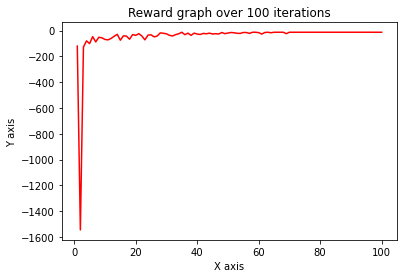

In [30]:
import matplotlib.pyplot as plt
x = np.arange(1, 101)
y = np.array(all_rewards)

plt.title("Reward graph over 100 iterations")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y, color ="red")
plt.show()